In [3]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats 
import warnings
plt.style.use(['ggplot'])

# Ignore divide by zero warning
warnings.filterwarnings("ignore", category=RuntimeWarning)

/tmp/ipykernel_50313/1285919236.py:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  pi_2 = qt.ry(np.pi/2) * psi_0
/tmp/ipykernel_50313/1285919236.py:9: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  b.add_states(qt.ry(np.pi/2)*phase)


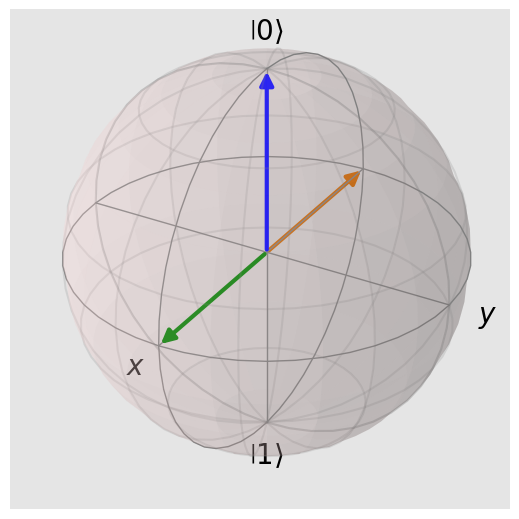

In [431]:
psi_0 = qt.basis(2,0)
psi_1 = qt.basis(2,1)
pi_2 = qt.ry(np.pi/2) * psi_0
phase = (psi_0 + np.exp(1j*np.pi)*psi_1).unit()

b = qt.Bloch()
b.add_states(pi_2)
b.add_states(phase)
b.add_states(qt.ry(np.pi/2)*phase)
b.show()

# Problem 1

## a

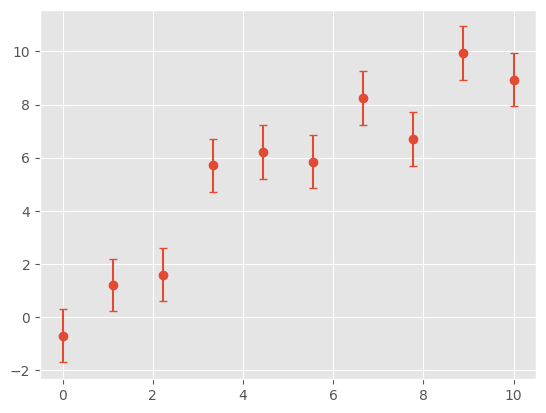

In [432]:
slope = 1
offset = 0.25
time = np.linspace(0,10,10)
data = np.random.normal(slope*time + offset, 1)
sigma = 1*np.random.normal(np.ones(len(data)),0.01)
plt.errorbar(time, data, sigma, fmt = 'o', capsize=3)
plt.show()


## b

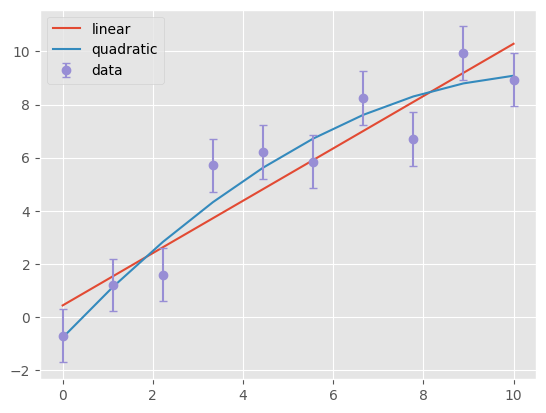

In [433]:
def linear_fit(time, a, b):
    return b*time + a

def quadratic_fit(time, a, b, c):
    return a + b*time + c*time**2

initial_guesses = [1, 0.9]

popt, pcov = curve_fit(linear_fit, xdata = time, ydata=data, sigma=sigma, p0=initial_guesses)
expected_linear = popt[1]*time+popt[0]
plt.plot(time, expected_linear, label = 'linear')

popt, pcov = curve_fit(quadratic_fit, xdata = time, ydata=data, sigma=sigma)
expected_quadratic = popt[2]*time**2+popt[1]*time+popt[0]
plt.plot(time, expected_quadratic, label = 'quadratic')
plt.errorbar(time, data, sigma, fmt = 'o', capsize=3, label = 'data')
plt.legend()
plt.show()

In [434]:
xi_linear = np.sum((expected_linear-data)**2/expected_linear**2)
xi_quadratic = np.sum((expected_quadratic-data)**2/expected_linear**2)
N = int(time.size)
print('linear ratio: ', xi_linear/(N-2))
print('quadratic ratio: ', xi_quadratic/(N-3))

linear ratio:  0.9491204407866254
quadratic ratio:  0.0704975096328883


The linear model is more likely since the ratio is closer to 1.

# Problem 3

## Part a)

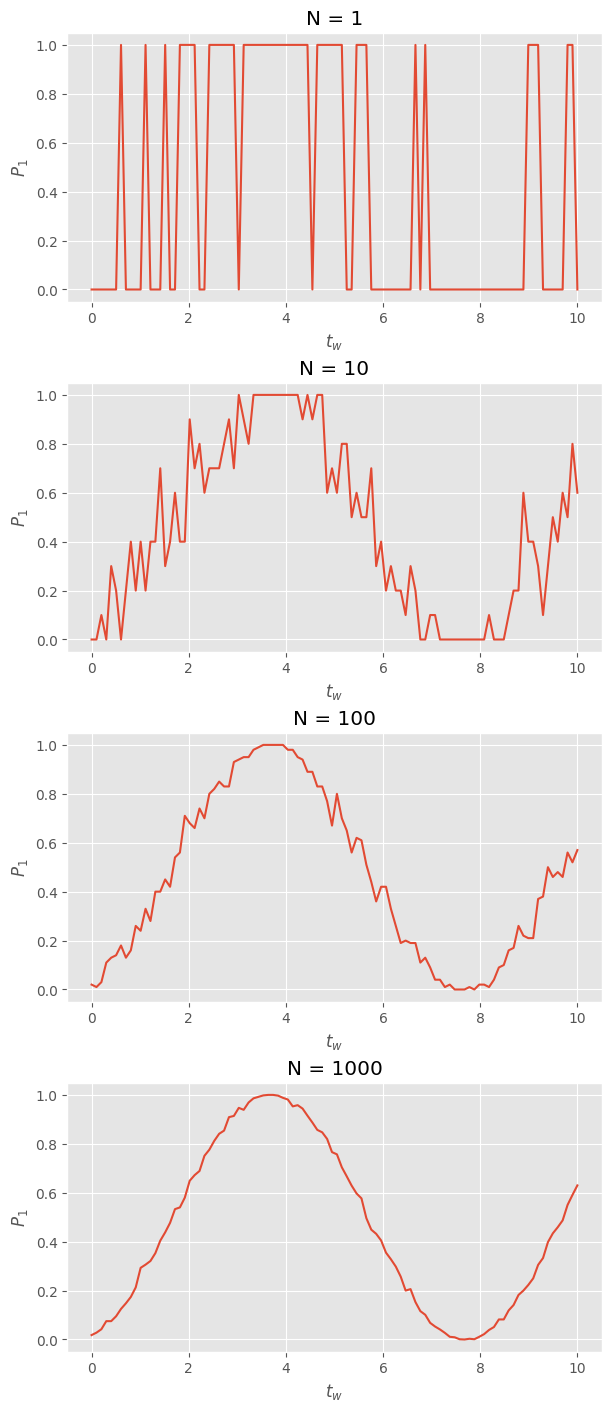

In [22]:

tw = np.linspace(0,10,100)   
def calculate_p1(tw, omega=2*np.pi, delta=np.pi/4):
    omega_prime = np.sqrt(omega**2 + delta**2)
    tp = (np.pi/2) / omega
    P1 = 1 - (omega**2 / omega_prime**4) * ((omega_prime * np.cos(delta * tw / 2) * np.sin(omega_prime * tp)) - 2 * delta * np.sin(delta * tw / 2) * np.sin(omega_prime * tp / 2)**2)**2
    return P1

def P1_trail(tw, N, delta = np.pi/4):
    P1 = calculate_p1(tw, delta = delta)
    P1_measured = []
    for i in range(P1.size):
        trials = np.random.binomial(1, P1[i], N)
        P1_measured.append(np.sum(trials)/N)
    return np.array(P1_measured)

def P1_trail_s(tw, N, delta = np.pi/4):
    P1 = calculate_p1(tw, delta = delta)
    P1_measured = []
    for i in range(P1.size):
        trials = np.random.binomial(1, P1, N)
        P1_measured.append(np.sum(trials)/N)
    return np.array(P1_measured)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(6, 14), constrained_layout=True)
N = [1, 10, 100, 1000]
for i in range(4):
    ax[i].plot(tw, P1_trail(tw, N[i]))
    ax[i].set_xlabel(r'$t_w$')
    ax[i].set_ylabel(r'$P_1$')
    ax[i].set_title('N = ' + str(N[i]))
plt.show()

## Part b)

0.5 point for N =  1  : 1.0101010101010102
0.5 point for N =  10  : 1.4141414141414141
0.5 point for N =  100  : 1.5151515151515151
0.5 point for N =  1000  : 1.7171717171717171


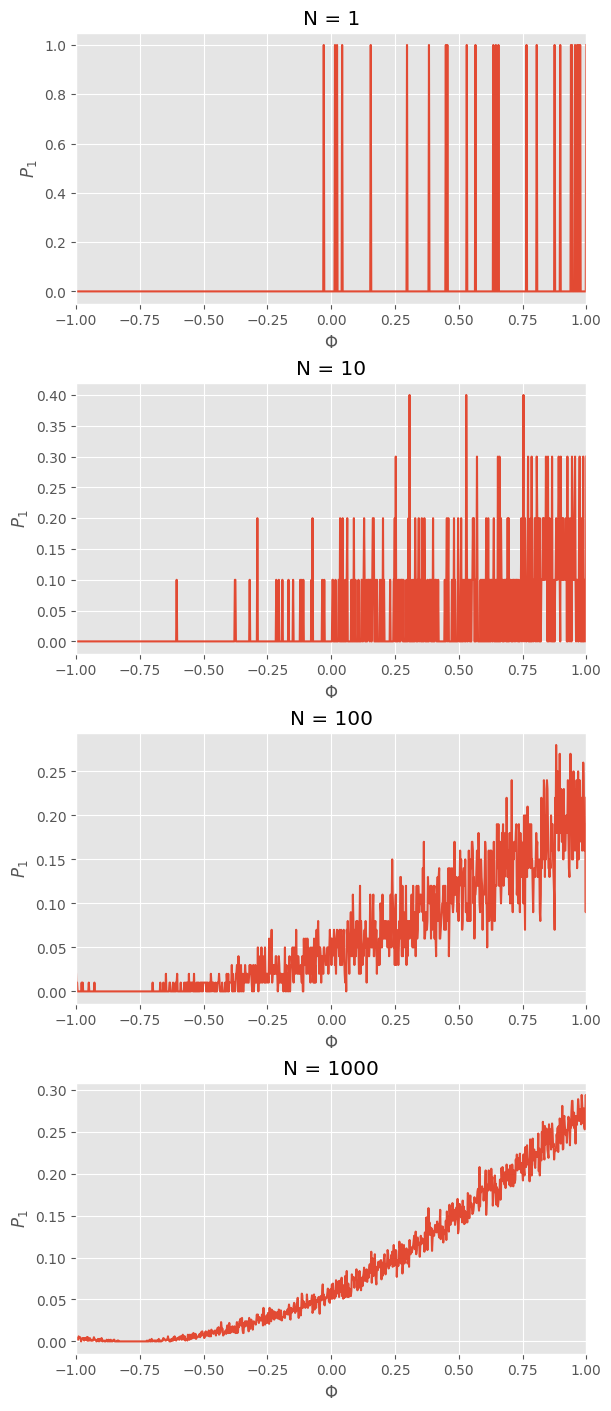

In [25]:
def find_closest_index(arr, threshold, start_idx=0, end_idx=None):
    """
    Find the index of the element in the array that is closest to the threshold value
    within the specified index range.

    Parameters:
    arr (numpy.ndarray): Input numpy array.
    threshold (float): Threshold value.
    start_idx (int, optional): Start index for search. Default is 0.
    end_idx (int, optional): End index for search. Default is None (end of array).

    Returns:
    int: Index of the closest element to the threshold value.
    """
    if end_idx is None:
        end_idx = len(arr)

    # Slice the array to specified index range
    sub_arr = arr[start_idx:end_idx]

    # Find index of closest element to the threshold value
    idx_closest = np.abs(sub_arr - threshold).argmin()

    # Adjust index to the original array
    idx_closest += start_idx

    return idx_closest

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(6, 14), constrained_layout=True)
gamma = 1
N = [1, 10, 100, 1000]
P1_N100 = 0
t_half = []

for i in range(4):
    measured_P1 = P1_trail(tw, N[i])
    if N[i] == 100:
        P1_N100 = measured_P1
    half_point = find_closest_index(measured_P1, 0.5, 10, 30)
    print('0.5 point for N = ', str(N[i]) , ' :', tw[half_point])
    t_half.append(half_point)
    # measured_phi = np.arccos(np.sqrt(measured_P1))*2
    # measured_flux = measured_phi/2/gamma/tw
    # ax[i].plot(measured_flux, measured_P1, 'o')
    # ax[i].set_xlabel(r'$\Phi$')
    # ax[i].set_ylabel(r'$P_1$')
    # ax[i].set_title('N = ' + str(N[i]))
    # ax[i].set_xlim(-1,1)

all_phi = np.linspace(-1, 1, 1000)
N_100 = []

for i in range(4):
    P1_list = []
    for j in range(all_phi.size):
        P1_list.append(P1_trail_s(tw[i], N[i], delta = np.pi/4+all_phi[j]))
        if N[i] == 100:
            N_100.append(P1_trail_s(tw[i], N[i], delta = np.pi/4+all_phi[j]))
    ax[i].plot(all_phi, P1_list)
    ax[i].set_xlabel(r'$\Phi$')
    ax[i].set_ylabel(r'$P_1$')
    ax[i].set_title('N = ' + str(N[i]))
    ax[i].set_xlim(-1,1)

It resemble the linear relationship that was outlined in the quantum sensing paper for the half point.

## Part c)

[]

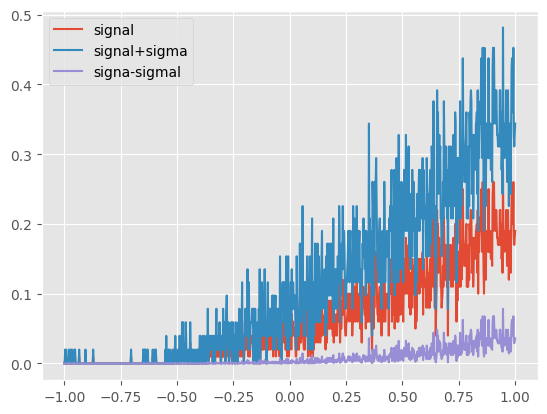

In [28]:
N_100 = np.array(N_100)
sigma_expect = N_100*(1-N_100)
all_phi = np.linspace(-1, 1, 1000)

plt.plot(all_phi, N_100, label = 'signal')
plt.plot(all_phi, N_100+sigma_expect, label = 'signal+sigma')
plt.plot(all_phi, N_100-sigma_expect, label = 'signa-sigmal')
plt.legend()
plt.plot()

This is as expected at the half point as the expected signal is bounded by the standard deviation well enough.

# Problem 4

## Part a)

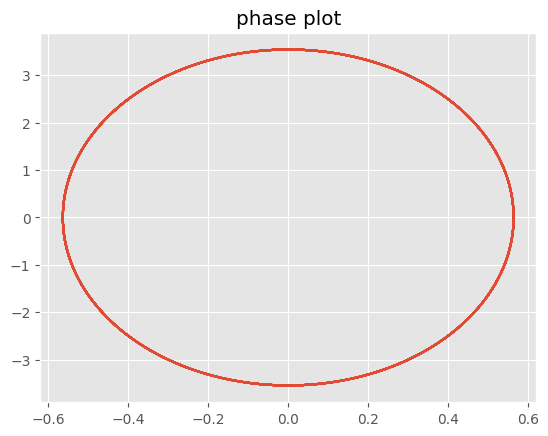

In [443]:
from qutip import create, destroy

N = 100
t = np.linspace(0, 10, 1000)
a = qt.destroy(N)
a_dag = qt.create(N)
omega = 2*np.pi
m = 1
alpha = qt.displace(N,1)*qt.basis(N, 0)
x_exp = []
p_exp = []

x_op=np.sqrt(1/(2*m*omega))*(a_dag+a)
p_op=-1j*np.sqrt((m*omega)/2)*(a-a_dag)



for i in range(t.size):
    H_over_h_bar = -1j*omega*t[i]*(a_dag*a + 1/2)
    U_t = H_over_h_bar.expm()
    state = U_t * alpha
    x_exp.append(qt.expect(x_op, state))
    p_exp.append(qt.expect(p_op, state))

x_exp = np.array(x_exp)
p_exp = np.array(p_exp)
plt.plot(x_exp, p_exp)
plt.title('phase plot')
plt.show()

## Part b)

[]

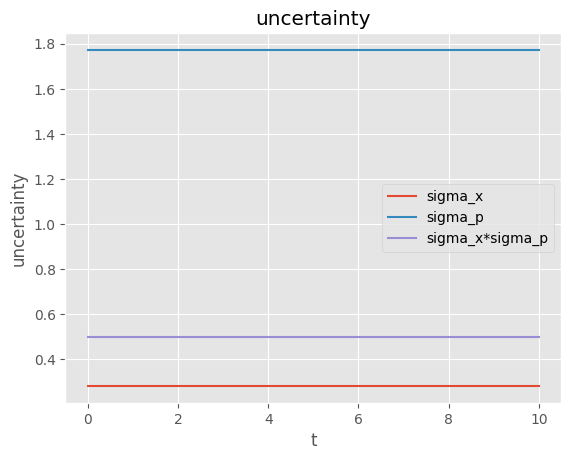

In [444]:
sigma_x = []
sigma_p = []

for i in range(t.size):
    H_over_h_bar = -1j*omega*t[i]*(a_dag*a + 1/2)
    U_t = H_over_h_bar.expm()
    state = U_t * alpha
    sigma_x.append(qt.expect(x_op**2, state))
    sigma_p.append(qt.expect(p_op**2, state))
    
sigma_x = np.array(sigma_x)
sigma_p = np.array(sigma_p)

sigma_x = np.sqrt(sigma_x - x_exp**2)
sigma_p = np.sqrt(sigma_p - p_exp**2)

plt.plot(t, sigma_x, label = 'sigma_x')
plt.plot(t, sigma_p, label = 'sigma_p')
plt.plot(t, sigma_x*sigma_p, label = 'sigma_x*sigma_p')
plt.legend()
plt.title('uncertainty')
plt.xlabel('t')
plt.ylabel('uncertainty')
plt.plot()

## part c)

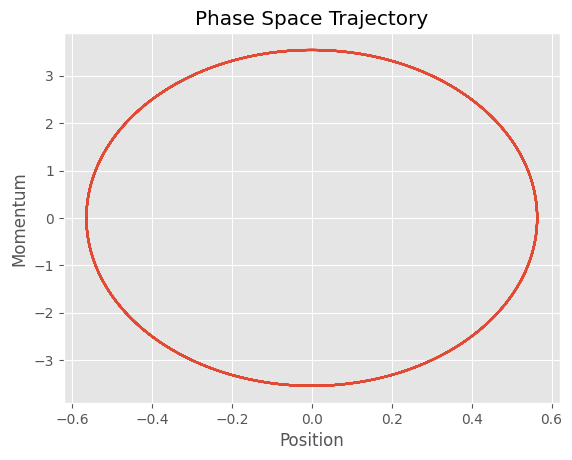

[]

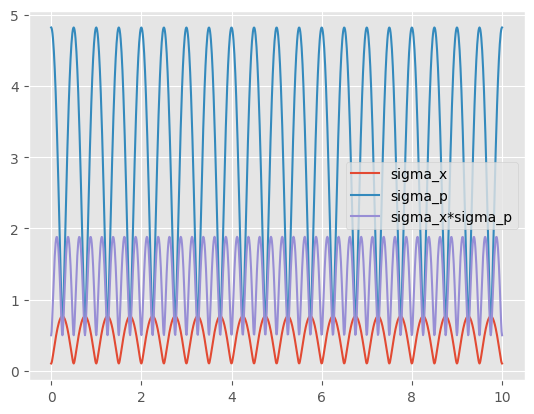

In [445]:
sqzed_psi = qt.displace(N, 1) * qt.squeeze(N, 1) * qt.basis(N, 0)

sigma_x = []
sigma_p = []
x_exp = []
p_exp = []

for i in range(t.size):
    H_over_h_bar = -1j*omega*t[i]*(a_dag*a + 1/2)
    U_t = H_over_h_bar.expm()
    state = U_t * sqzed_psi
    x_exp.append(qt.expect(x_op, state))
    p_exp.append(qt.expect(p_op, state))
    sigma_x.append(qt.expect(x_op**2, state))
    sigma_p.append(qt.expect(p_op**2, state))

x_exp = np.array(x_exp)
p_exp = np.array(p_exp)
plt.plot(x_exp, p_exp)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Space Trajectory')
plt.show()

sigma_x = np.array(sigma_x)
sigma_p = np.array(sigma_p)

sigma_x = np.sqrt(sigma_x - x_exp**2)
sigma_p = np.sqrt(sigma_p - p_exp**2)

plt.plot(t, sigma_x, label = 'sigma_x')
plt.plot(t, sigma_p, label = 'sigma_p')
plt.plot(t, sigma_x*sigma_p, label = 'sigma_x*sigma_p')
plt.legend()
plt.plot()

## Part d)

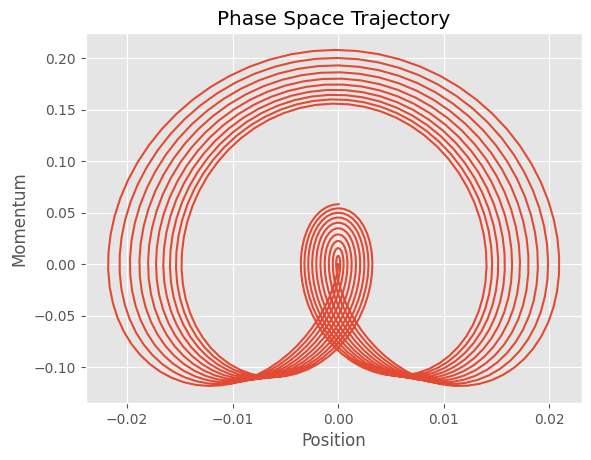

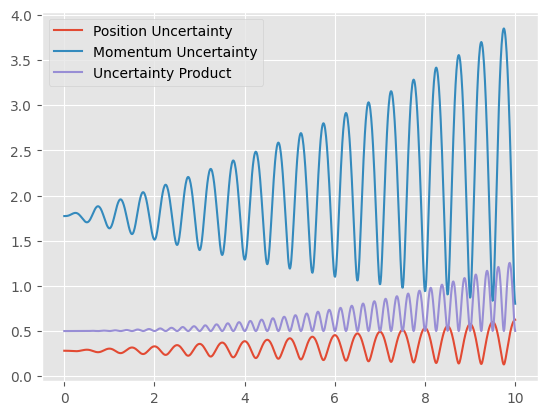

In [441]:
from qutip import *

# Define the harmonic oscillator Hamiltonian
H0 = omega * (a_dag * a + 1/2)
# Prepare the initial state as the ground state
psi_0 = basis(N, 0)

# betas
beta1 = 1
beta2 = 1

# Time-dependent coefficients for driving terms
def H1(t, args): 
  return beta1*np.sin(2 * omega * t)

def H2(t, args): 
  return beta2*np.sin(2 * omega * t)

# Time-dependent Hamiltonian
H_td = [H0, [x_op, H1], [x_op**2, H2]]

# Solve the Schrödinger equation
result = sesolve(H_td, psi_0, t, e_ops=[x_op, p_op, x_op**2, p_op**2])

# Calculate expectations and variances
x_exp, p_exp, x_sq, p_sq = result.expect
sigma_x = np.sqrt(x_sq - x_exp**2)
sigma_p = np.sqrt(p_sq - p_exp**2)
# sigma_x = x_sq - x_exp**2
# sigma_p = p_sq - p_exp**2

# Plot phase space trajectory
plt.plot(x_exp, p_exp)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Space Trajectory')
plt.show()

# Plot uncertainties over time
plt.plot(t, sigma_x, label='Position Uncertainty')
plt.plot(t, sigma_p, label='Momentum Uncertainty')
plt.plot(t, sigma_x * sigma_p, label='Uncertainty Product')
plt.legend()
plt.show()

## part e)

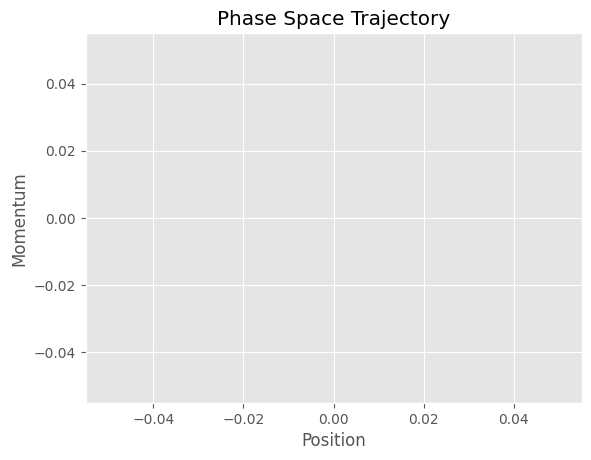

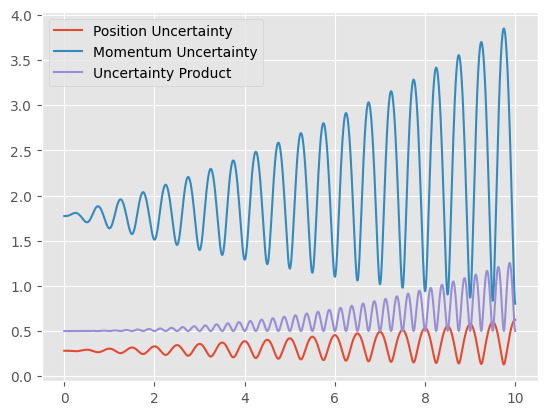

In [442]:
# Define the harmonic oscillator Hamiltonian
H0 = omega * (a_dag * a + 1/2)
# Prepare the initial state as the ground state
psi_0 = basis(N, 0)

# betas
beta1 = 0
beta2 = 1

# Time-dependent coefficients for driving terms
def H1(t, args): 
  return beta1*np.sin(2 * omega * t)

def H2(t, args): 
  return beta2*np.sin(2 * omega * t)

# Time-dependent Hamiltonian
H_td = [H0, [x_op, H1], [x_op**2, H2]]

# Solve the Schrödinger equation
result = sesolve(H_td, psi_0, t, e_ops=[x_op, p_op, x_op**2, p_op**2])

# Calculate expectations and variances
x_exp, p_exp, x_sq, p_sq = result.expect
sigma_x = np.sqrt(x_sq - x_exp**2)
sigma_p = np.sqrt(p_sq - p_exp**2)
# sigma_x = x_sq - x_exp**2
# sigma_p = p_sq - p_exp**2

# Plot phase space trajectory
plt.plot(x_exp, p_exp)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Space Trajectory')
plt.show()

# Plot uncertainties over time
plt.plot(t, sigma_x, label='Position Uncertainty')
plt.plot(t, sigma_p, label='Momentum Uncertainty')
plt.plot(t, sigma_x * sigma_p, label='Uncertainty Product')
plt.legend()
plt.show()

* The phase plot is empty, which indicates the fact that this is still a Fock state because the $\beta_1$ terms becomes zero and it is never displaced to coherent state. The linear term is thus the term for displacement.
* The quad term is still present, thus the state is still squeezed.